In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.datasets import fashion_mnist
from minisom import MiniSom 
from math import sqrt
from sklearn.preprocessing import scale

## Blood images rezising

In [32]:
## Blood images rezising

import os
from PIL import Image
def image_to_array(file_path):
    img = Image.open(file_path)  # Open the image
    img = img.resize((64, 64), Image.ANTIALIAS)  # Resize to 32x32
    img_array = np.array(img)  # Convert the image to a NumPy array
    return img_array

folders = ['BAS', 'BNE', 'EO', 'ERB', 'LY', 'MO']
blood_x = []
blood_y = []

for idx,folder in enumerate(folders):
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):  # Process only JPEG images
            file_path = os.path.join(folder, filename)
            pixel_array = image_to_array(file_path)  # Get the pixel data as a single array
            blood_x.append(pixel_array)  # Append the pixel array to the list
            blood_y.append(idx)

C:\Users\migue\AppData\Local\Temp\ipykernel_17316\2282203727.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((64, 64), Image.ANTIALIAS)  # Resize to 32x32


In [33]:
from sklearn.model_selection import train_test_split

combined_data = list(zip(blood_x, blood_y))
np.random.shuffle(combined_data)
shuffled_x, shuffled_y = zip(*combined_data)
blood_x = np.array(shuffled_x)
blood_y = np.array(shuffled_y)

blood_x_train, blood_x_test, blood_y_train, blood_y_test = train_test_split(blood_x, blood_y, test_size = 0.20, random_state = 1234)    

In [34]:
blood_x_train[0].shape

(64, 64, 3)

## Blood CNN

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint('best_model_blood.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='leaky_relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='leaky_relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())

    model.add(layers.Dense(256, activation='leaky_relu'))
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(128, activation='leaky_relu'))
    model.add(layers.Dense(6, activation='softmax')) # 6 classes
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])     
    
history = model.fit(blood_x_train, blood_y_train, epochs=25, validation_data=(blood_x_test, blood_y_test), callbacks=[checkpoint_callback])     

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/25
75/76 [============================>.] - ETA: 0s - loss: 4.9243 - accuracy: 0.5371
Epoch 1: val_accuracy improved from -inf to 0.80431, saving model to best_model_blood.h5
76/76 [==============================] - 16s 161ms/step - loss: 4.9075 - accuracy: 0.5380 - val_loss: 0.4937 - val_accuracy: 0.8043
Epoch 2/25
76/76 [==============================] - ETA: 0s - loss: 0.5022 - accuracy: 0.8198
Epoch 2: val_accuracy improved from 0.80431 to 0.86733, saving model to best_model_blood.h5
76/76 [==============================] - 10s 137ms/step - loss: 0.5022 - accuracy: 0.8198 - val_loss: 0.3691 - val_accuracy: 0.8673
Epoch 3/25
76/76 [==============================] - ETA: 0s - loss: 0.3613 - accuracy: 0.8804
Epoch 3: val_accuracy improved from 0.86733 to 0.87396, saving model to best_model_blood.h5
76/76 [==============================] - 11s 138ms/step - loss: 0.3613 - accura

In [36]:
# Load the model with the best performance
best_model = tf.keras.models.load_model('best_model_blood.h5')
val_loss, val_accuracy = best_model.evaluate(blood_x_test, blood_y_test)
print(f"Validation Accuracy: {val_accuracy}")

19/19 [==============================] - 1s 43ms/step - loss: 0.1476 - accuracy: 0.9652
Validation Accuracy: 0.96517413854599


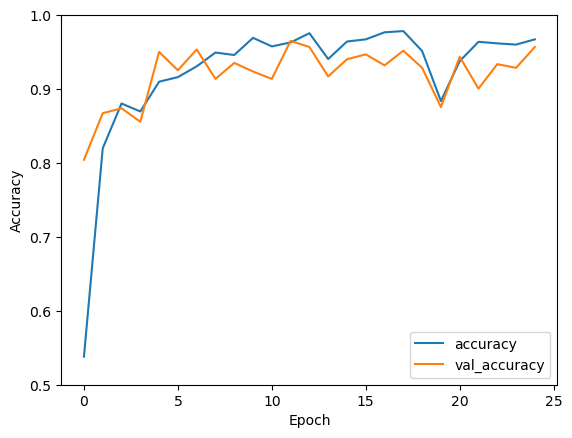

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Satellite image resizing

In [8]:
folders = ['Agua', 'Bosque', 'Ciudad', 'Cultivo', 'Desierto', 'Montana']
sat_x = []
sat_y = []
for idx,folder in enumerate(folders):
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):  # Process only JPEG images
            file_path = os.path.join(folder, filename)
            pixel_array = image_to_array(file_path)  # Get the pixel data as a single array
            sat_x.append(pixel_array)  # Append the pixel array to the list
            sat_y.append(idx)
            
combined_data = list(zip(sat_x, sat_y))
np.random.shuffle(combined_data)
shuffled_x, shuffled_y = zip(*combined_data)
sat_x = np.array(shuffled_x)
sat_y = np.array(shuffled_y)

sat_x_train, sat_x_test, sat_y_train, sat_y_test = train_test_split(sat_x, sat_y, test_size = 0.20, random_state = 1234)

C:\Users\migue\AppData\Local\Temp\ipykernel_17316\1578728770.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)  # Resize to 32x32


In [9]:
checkpoint_callback = ModelCheckpoint('best_model_sat.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model2 = models.Sequential()
    model2.add(layers.Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(128, 128, 3)))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), activation='leaky_relu'))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), activation='leaky_relu'))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Flatten())

    model2.add(layers.Dense(256, activation='leaky_relu'))
    model2.add(layers.Dropout(0.5)) 
    model2.add(layers.Dense(256, activation='leaky_relu'))
    model2.add(layers.Dropout(0.5)) 
    model2.add(layers.Dense(256, activation='leaky_relu'))
    model2.add(layers.Dropout(0.5)) 
    model2.add(layers.Dense(128, activation='leaky_relu'))
    model2.add(layers.Dense(6, activation='softmax')) # 6 classes
    model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])     
    
history2 = model2.fit(sat_x_train, sat_y_train, epochs=40, validation_data=(sat_x_test, sat_y_test), callbacks=[checkpoint_callback])  

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/40
51/51 [==============================] - ETA: 0s - loss: 7.5064 - accuracy: 0.2432
Epoch 1: val_accuracy improved from -inf to 0.54950, saving model to best_model_sat.h5
51/51 [==============================] - 45s 824ms/step - loss: 7.5064 - accuracy: 0.2432 - val_loss: 1.0718 - val_accuracy: 0.5495
Epoch 2/40
51/51 [==============================] - ETA: 0s - loss: 1.5879 - accuracy: 0.4541
Epoch 2: val_accuracy improved from 0.54950 to 0.68069, saving model to best_model_sat.h5
51/51 [==============================] - 37s 718ms/step - loss: 1.5879 - accuracy: 0.4541 - val_loss: 0.8915 - val_accuracy: 0.6807
Epoch 3/40
51/51 [==============================] - ETA: 0s - loss: 1.3058 - accuracy: 0.5571
Epoch 3: val_accuracy did not improve from 0.68069
51/51 [==============================] - 36s 707ms/step - loss: 1.3058 - accuracy: 0.5571 - val_loss: 0.9704 - val_accuracy:

Epoch 29/40
51/51 [==============================] - ETA: 0s - loss: 0.2129 - accuracy: 0.9479
Epoch 29: val_accuracy did not improve from 0.86139
51/51 [==============================] - 37s 733ms/step - loss: 0.2129 - accuracy: 0.9479 - val_loss: 0.6460 - val_accuracy: 0.8218
Epoch 30/40
51/51 [==============================] - ETA: 0s - loss: 0.2197 - accuracy: 0.9454
Epoch 30: val_accuracy did not improve from 0.86139
51/51 [==============================] - 37s 718ms/step - loss: 0.2197 - accuracy: 0.9454 - val_loss: 0.9232 - val_accuracy: 0.8342
Epoch 31/40
51/51 [==============================] - ETA: 0s - loss: 0.1745 - accuracy: 0.9485
Epoch 31: val_accuracy did not improve from 0.86139
51/51 [==============================] - 36s 698ms/step - loss: 0.1745 - accuracy: 0.9485 - val_loss: 0.9632 - val_accuracy: 0.8168
Epoch 32/40
51/51 [==============================] - ETA: 0s - loss: 0.2115 - accuracy: 0.9423
Epoch 32: val_accuracy did not improve from 0.86139
51/51 [=========

In [10]:
# Load the model with the best performance
best_model2 = tf.keras.models.load_model('best_model_sat.h5')
val_loss, val_accuracy = best_model2.evaluate(sat_x_test, sat_y_test)
print(f"Validation Accuracy: {val_accuracy}")

13/13 [==============================] - 4s 260ms/step - loss: 0.4750 - accuracy: 0.8614
Validation Accuracy: 0.8613861203193665


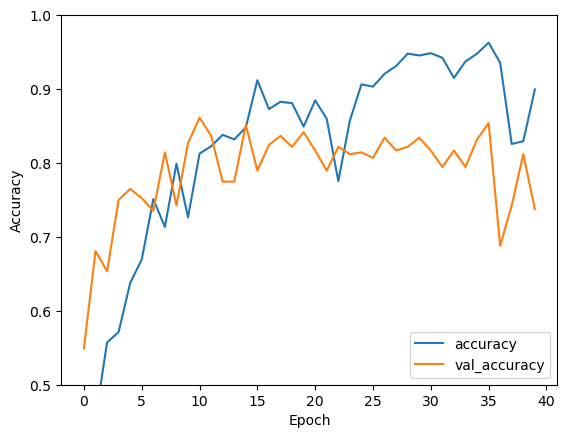

In [11]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Fashion CNN

In [12]:
(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = fashion_mnist.load_data()
#fashion_x_train, fashion_x_test, fashion_y_train, fashion_y_test = train_test_split(fashion_x_test, fashion_y_test, test_size = 0.20, random_state = 1234)
fashion_x_train[0].shape

(28, 28)

In [13]:
checkpoint_callback = ModelCheckpoint('best_model_fashion.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

with strategy.scope():
    model3 = models.Sequential()
    model3.add(layers.Reshape((28, 28, 1), input_shape=(28, 28))) 
    model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model3.add(layers.MaxPooling2D((2, 2)))
    model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model3.add(layers.MaxPooling2D((2, 2)))
    model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model3.add(layers.Flatten())

    model3.add(layers.Dense(128, activation='leaky_relu'))
    model3.add(layers.Dropout(0.5)) 
    model3.add(layers.Dense(128, activation='leaky_relu'))
    model3.add(layers.Dropout(0.5))
    model3.add(layers.Dense(128, activation='leaky_relu'))
    model3.add(layers.Dropout(0.5))
    model3.add(layers.Dense(64, activation='leaky_relu'))
    model3.add(layers.Dense(10, activation='softmax')) # 10 classes
    model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])     
    
history3 = model3.fit(fashion_x_train, fashion_y_train, epochs=25, validation_data=(fashion_x_test, fashion_y_test), callbacks=[checkpoint_callback])  

Epoch 1/25
1875/1875 [==============================] - ETA: 0s - loss: 0.8520 - accuracy: 0.7163
Epoch 1: val_accuracy improved from -inf to 0.83660, saving model to best_model_fashion.h5
1875/1875 [==============================] - 77s 39ms/step - loss: 0.8520 - accuracy: 0.7163 - val_loss: 0.4461 - val_accuracy: 0.8366
Epoch 2/25
1874/1875 [============================>.] - ETA: 0s - loss: 0.4761 - accuracy: 0.8324
Epoch 2: val_accuracy improved from 0.83660 to 0.85750, saving model to best_model_fashion.h5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.4761 - accuracy: 0.8325 - val_loss: 0.3966 - val_accuracy: 0.8575
Epoch 3/25
1874/1875 [============================>.] - ETA: 0s - loss: 0.4168 - accuracy: 0.8566
Epoch 3: val_accuracy improved from 0.85750 to 0.86650, saving model to best_model_fashion.h5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4167 - accuracy: 0.8566 - val_loss: 0.3835 - val_accuracy: 0.8665
Epoch 4/25
1875/1875 [

In [14]:
# Load the model with the best performance
best_model3 = tf.keras.models.load_model('best_model_fashion.h5')
val_loss, val_accuracy = best_model3.evaluate(fashion_x_test, fashion_y_test)
print(f"Validation Accuracy: {val_accuracy}")

313/313 [==============================] - 4s 12ms/step - loss: 0.3924 - accuracy: 0.8933
Validation Accuracy: 0.8932999968528748


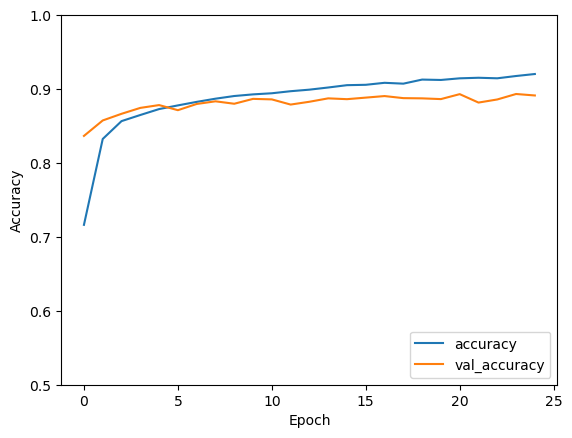

In [15]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

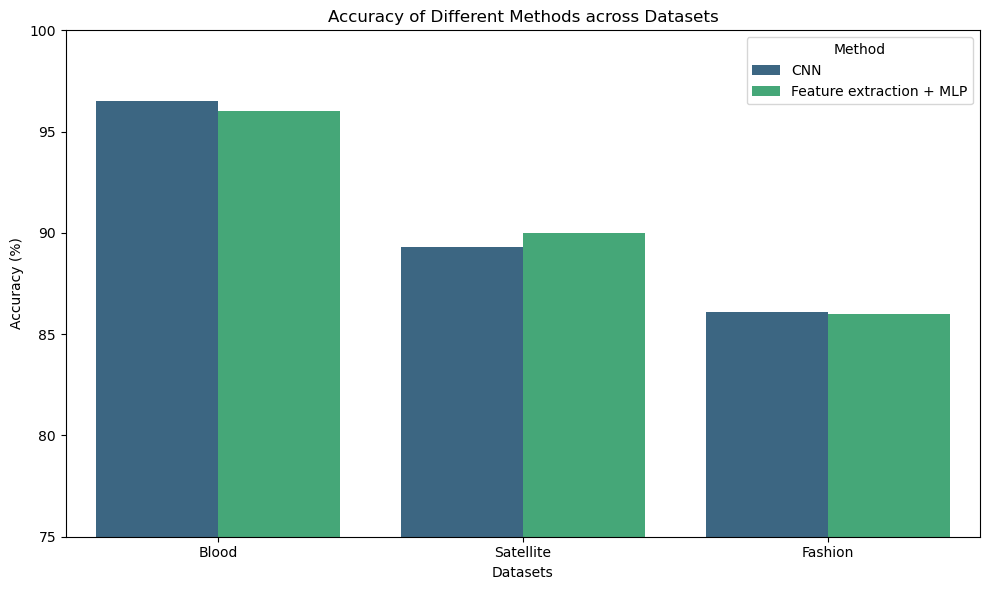

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Dataset': ['Blood','Blood','Satellite','Satellite','Fashion','Fashion'],
    'Method': ['CNN', 'Feature extraction + MLP']*3,
    'Accuracy (%)': [96.5, 96, 89.3, 90, 86.1, 86]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Accuracy (%)', hue = 'Method', data=data, palette='viridis')
plt.title('Accuracy of Different Methods across Datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracy (%)')
plt.ylim(75, 100) 
plt.legend(title='Method')

plt.tight_layout()
plt.show()
